## Intro to Unstructured Data

Unstructured data is a fascinating domain, and one that is growing rapidly. Unstructured data is essentially enything that doesn't fit nicely into some sort of schema-on-write store. 

_"Unstructured data is information that either does not have a pre-defined data model or is not organized in a pre-defined manner. Unstructured information is typically text-heavy, but may contain data such as dates, numbers, and facts as well."_
   -- <a href="https://en.wikipedia.org/wiki/Unstructured_data">__Wikipedia__</a>.

Unstructured data can be used to understand human behaviour, recognize patterns in nature, interpret bodies of text, and much more. Some common examples include:

- Pictures
- Text
- Audio Files
- Various text file types
- Emails
- Location Data

__The process for working with unstructured data is generally fairly similar across data types. At a high level you need to:__

- Get data into a nicely machine readable format.


- Extract information that can be indexed. This could mean:
    - OCR'ing documents
    - Transcribing audio
    - Extracting coordinates from addresses
    - Reading XML or other internal structure of a document
    
    
- Choose some set of features to engineer for each data point. Such as:
    - Extracting common words in a sample of text
    - Creating features based on location categories (country, region, metro area, etc)
    - Classifying pictures either by hand, or using machine learning of some variety
    
__For many applications, text analysis is quite important - so we'll start there__

Note - nltk can be pip or pip3 installed, but you'll likely need to run 'nltk.download('punkt')' in order to get everything working correctly.

In [1]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 3.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 3.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
#import nltk, sklearn, pandas, numpy, matplotlib

import nltk
from nltk.tokenize.api import TokenizerI
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [10]:
#read in the dataset you built from the scrape of the books website and display the top of the df

data = pd.read_csv('scraped_books.csv', index_col=0)
data.head()

,Title,Price,Description,Rating,Link,Genre
0,A Light in the Attic,Â£51.77,It's hard to imagine a world without A Light i...,Three,a-light-in-the-attic_1000/index.html,Poetry
1,Tipping the Velvet,Â£53.74,"""Erotic and absorbing...Written with starling ...",One,tipping-the-velvet_999/index.html,Historical Fiction
2,Soumission,Â£50.10,"Dans une France assez proche de la nÃ´tre, un ...",One,soumission_998/index.html,Fiction
3,Sharp Objects,Â£47.82,"WICKED above her hipbone, GIRL across her hear...",Four,sharp-objects_997/index.html,Mystery
4,Sapiens: A Brief History of Humankind,Â£54.23,From a renowned historian comes a groundbreaki...,Five,sapiens-a-brief-history-of-humankind_996/index...,History


In [11]:
# let's get the price better prepared

data['Price'] = data['Price'].str.replace("\u00C2\u00A3", "")
data.head()

,Title,Price,Description,Rating,Link,Genre
0,A Light in the Attic,51.77,It's hard to imagine a world without A Light i...,Three,a-light-in-the-attic_1000/index.html,Poetry
1,Tipping the Velvet,53.74,"""Erotic and absorbing...Written with starling ...",One,tipping-the-velvet_999/index.html,Historical Fiction
2,Soumission,50.10,"Dans une France assez proche de la nÃ´tre, un ...",One,soumission_998/index.html,Fiction
3,Sharp Objects,47.82,"WICKED above her hipbone, GIRL across her hear...",Four,sharp-objects_997/index.html,Mystery
4,Sapiens: A Brief History of Humankind,54.23,From a renowned historian comes a groundbreaki...,Five,sapiens-a-brief-history-of-humankind_996/index...,History


In [12]:
# The rating should also be formatted better. let's see the unique values first;

data['Rating'].unique()

array(['Three', 'One', 'Four', 'Five', 'Two'], dtype=object)

In [15]:
rating_dict = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
def convert_rating(input_string):
    return rating_dict[input_string]

# print(convert_rating('One'))

data['Rating'] = [convert_rating(rating) for rating in data['Rating']]
data.head()

,Title,Price,Description,Rating,Link,Genre
0,A Light in the Attic,51.77,It's hard to imagine a world without A Light i...,3,a-light-in-the-attic_1000/index.html,Poetry
1,Tipping the Velvet,53.74,"""Erotic and absorbing...Written with starling ...",1,tipping-the-velvet_999/index.html,Historical Fiction
2,Soumission,50.10,"Dans une France assez proche de la nÃ´tre, un ...",1,soumission_998/index.html,Fiction
3,Sharp Objects,47.82,"WICKED above her hipbone, GIRL across her hear...",4,sharp-objects_997/index.html,Mystery
4,Sapiens: A Brief History of Humankind,54.23,From a renowned historian comes a groundbreaki...,5,sapiens-a-brief-history-of-humankind_996/index...,History


In [21]:
data['Rating'], data['Price'] = data['Rating'].astype('int64'), data['Price'].astype('float64')
data.dtypes

Title           object
Price          float64
Description     object
Rating           int64
Link            object
Genre           object
dtype: object

In [22]:
#check if there are any nulls to deal with

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1000 non-null   object 
 1   Price        1000 non-null   float64
 2   Description  1000 non-null   object 
 3   Rating       1000 non-null   int64  
 4   Link         1000 non-null   object 
 5   Genre        1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 54.7+ KB


In [23]:
#view counts of the ratings columns

data.Rating.value_counts()

1    226
3    203
5    196
2    196
4    179
Name: Rating, dtype: int64

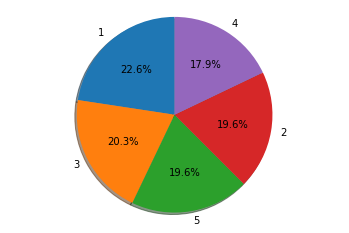

In [24]:
#pie chart the ratings to get a feel for distribution

labels = data.Rating.value_counts().index
sizes = data.Rating.value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [25]:
#there are lots of genres, so just show the number of books in each genre

data.Genre.value_counts()

Default               152
Nonfiction            110
Sequential Art         75
Add a comment          67
Fiction                65
Young Adult            54
Fantasy                48
Romance                35
Mystery                32
Food and Drink         30
Childrens              29
Historical Fiction     26
Poetry                 19
Classics               19
History                18
Horror                 17
Womens Fiction         17
Science Fiction        16
Science                14
Music                  13
Business               12
Thriller               11
Travel                 11
Philosophy             11
Humor                  10
Autobiography           9
Art                     8
Psychology              7
Religion                7
Spirituality            6
Christian Fiction       6
New Adult               6
Sports and Games        5
Biography               5
Self Help               5
Health                  4
Christian               3
Politics                3
Contemporary

There are plenty of interesting questions to answer here. We'll start with keyword based engineering, and then get more complex. A few ideas that come to mind (we won't do all of them, but think about what you might do on your own with this data set):

- Use descriptions to predict genre
- Use price and genre to predict rating
- Use title to predict genre

We'll start by building some features that tell us the most common words in each description.

Before we get started on our data set, let's get familiar with a new package, called nltk. NLTK stands for Natural Language Tool Kit, and it's often used for manual text analytics work. Docs are [here.](https://nltk.readthedocs.io/en/latest/)

In [28]:
#here's a freebie word_tokenize() turns a string of text into a list of tokens.
import nltk
nltk.download('punkt')

test = nltk.word_tokenize('Hello zipcoder. I hope you have an amazing day!')
test

[nltk_data] Downloading package punkt to /Users/nick/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Hello',
 'zipcoder',
 '.',
 'I',
 'hope',
 'you',
 'have',
 'an',
 'amazing',
 'day',
 '!']

Next, let's try tokenizing one of the book descriptions.

[This](https://www.pythonprogramming.in/find-frequency-of-each-word-from-a-text-file-using-nltk.html) link will help get you on the right track

In [29]:
#show the description of the first book in the dataframe

data.Description[0]

"It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Baby, I think someone down here'sGot it in for you. Shel, you never sounde

In [30]:
#tokenize the description of the first book in the dataframe

first = nltk.word_tokenize(data.Description[0])
first

['It',
 "'s",
 'hard',
 'to',
 'imagine',
 'a',
 'world',
 'without',
 'A',
 'Light',
 'in',
 'the',
 'Attic',
 '.',
 'This',
 'now-classic',
 'collection',
 'of',
 'poetry',
 'and',
 'drawings',
 'from',
 'Shel',
 'Silverstein',
 'celebrates',
 'its',
 '20th',
 'anniversary',
 'with',
 'this',
 'special',
 'edition',
 '.',
 'Silverstein',
 "'s",
 'humorous',
 'and',
 'creative',
 'verse',
 'can',
 'amuse',
 'the',
 'dowdiest',
 'of',
 'readers',
 '.',
 'Lemon-faced',
 'adults',
 'and',
 'fidgety',
 'kids',
 'sit',
 'still',
 'and',
 'read',
 'these',
 'rhythmic',
 'words',
 'and',
 'laugh',
 'and',
 'smile',
 'and',
 'love',
 'th',
 'It',
 "'s",
 'hard',
 'to',
 'imagine',
 'a',
 'world',
 'without',
 'A',
 'Light',
 'in',
 'the',
 'Attic',
 '.',
 'This',
 'now-classic',
 'collection',
 'of',
 'poetry',
 'and',
 'drawings',
 'from',
 'Shel',
 'Silverstein',
 'celebrates',
 'its',
 '20th',
 'anniversary',
 'with',
 'this',
 'special',
 'edition',
 '.',
 'Silverstein',
 "'s",
 'humorous

In [31]:
#now let's figure out the frequency of each word

frequency = nltk.FreqDist(first)
frequency

FreqDist({'and': 14, '.': 9, 'the': 5, 'of': 5, 'Silverstein': 5, ',': 5, "'s": 4, 'in': 4, 'you': 4, 'to': 3, ...})

What are the 10 most common words?

In [32]:
#display the 10 most common words

frequency.most_common(10)

[('and', 14),
 ('.', 9),
 ('the', 5),
 ('of', 5),
 ('Silverstein', 5),
 (',', 5),
 ("'s", 4),
 ('in', 4),
 ('you', 4),
 ('to', 3)]

What do you notice about the most common words? They aren't particularly valuable in telling us what the book is about, because they're words that are common in all text. Words like "the", "and", "of", etc, are common in all of human language, so they won't be helpful to us. 

So, let's filter those sorts of words out. These words are called stopwords, and nltk has a library of them. You can also add your own custom stopwords you'd like to filter out, but for now let's the standard ones from nltk.

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/nick/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
#import nltk's stopword corpus

from nltk.corpus import stopwords

In [37]:
#set the stopwords to only include english words

stopwords = stopwords.words('english')

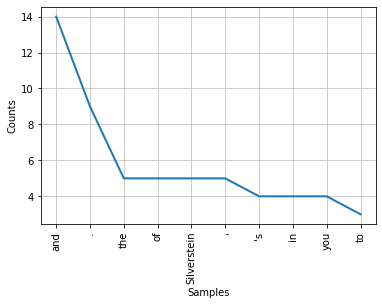

In [38]:
#plot the top 10 words

frequency.plot(10)
plt.show()

In [39]:
#remove stopwords from the FreqDist

frequency = [(w, f) for (w, f) in frequency.items() if w not in stopwords]
frequency

[('It', 2),
 ("'s", 4),
 ('hard', 2),
 ('imagine', 2),
 ('world', 2),
 ('without', 2),
 ('A', 2),
 ('Light', 2),
 ('Attic', 2),
 ('.', 9),
 ('This', 2),
 ('now-classic', 2),
 ('collection', 2),
 ('poetry', 2),
 ('drawings', 2),
 ('Shel', 3),
 ('Silverstein', 5),
 ('celebrates', 2),
 ('20th', 2),
 ('anniversary', 2),
 ('special', 2),
 ('edition', 2),
 ('humorous', 2),
 ('creative', 2),
 ('verse', 2),
 ('amuse', 2),
 ('dowdiest', 2),
 ('readers', 2),
 ('Lemon-faced', 2),
 ('adults', 2),
 ('fidgety', 2),
 ('kids', 2),
 ('sit', 2),
 ('still', 2),
 ('read', 2),
 ('rhythmic', 2),
 ('words', 2),
 ('laugh', 2),
 ('smile', 2),
 ('love', 2),
 ('th', 1),
 ('Need', 1),
 ('proof', 1),
 ('genius', 1),
 ('?', 3),
 ('RockabyeRockabye', 1),
 ('baby', 1),
 (',', 5),
 ('treetopDo', 1),
 ("n't", 1),
 ('know', 1),
 ('treetopIs', 1),
 ('safe', 1),
 ('place', 1),
 ('rock', 1),
 ('And', 2),
 ('put', 1),
 ('cradle', 1),
 ('Baby', 1),
 ('I', 1),
 ('think', 1),
 ('someone', 1),
 ("here'sGot", 1),
 ('never', 1),


In [40]:
#sort by frequency

frequency.sort(key=lambda tup: tup[1], reverse=True)

In [41]:
#show top 10 values in the list

frequency[:10]

[('.', 9),
 ('Silverstein', 5),
 (',', 5),
 ("'s", 4),
 ('Shel', 3),
 ('?', 3),
 ('It', 2),
 ('hard', 2),
 ('imagine', 2),
 ('world', 2)]

If you did the above correctly, you should notice the most common tokens are bits of punctuation. In this context, we care much more about the words themselves, so let's refine our list of tokens to not include punctuation. The easiest way to do this is to throw out items that are only one character long.

In [42]:
#filter your list of tuples and keep only tokens longer than 1 character

frequency = [(w, f) for (w, f) in frequency if len(w) > 1]

In [19]:
#take a look at the top 10 words now

frequency[:10]

[('Silverstein', 5),
 ("'s", 4),
 ('Shel', 3),
 ('It', 2),
 ('hard', 2),
 ('imagine', 2),
 ('world', 2),
 ('without', 2),
 ('Light', 2),
 ('Attic', 2)]

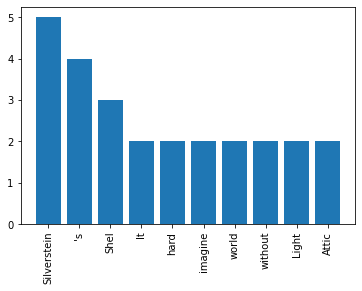

In [43]:
#bar chart the top 10 words and their respective frequencies

frequency = frequency[:10]

plt.bar(*zip(*frequency))
plt.xticks(rotation=90)
plt.show()

This has been a very basic lab that demonstrates how to tokenize a chunk of text and whittle down the tokens to a meaningful corpus. In the real world, this kind of tokenizing is used for finding comments, posts, logs, emails, etc that contain your target words.

In the next lab, we'll pick 10 books from a particular genre, combine all their descriptions, find the most common words, and then see if we can predict which other books fall into the same genre.